# import libraries

In [1]:
import numpy as np
import pandas as pd
# visualization
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import(StandardScaler,
                                  
                                   OneHotEncoder,
                                  FunctionTransformer,OrdinalEncoder,
                                 LabelEncoder)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import(cross_val_predict,
                                     cross_val_score,
                                     train_test_split)

from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
import warnings  
warnings.simplefilter("ignore")

#  load data & exploration

In [3]:
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

- check outliers

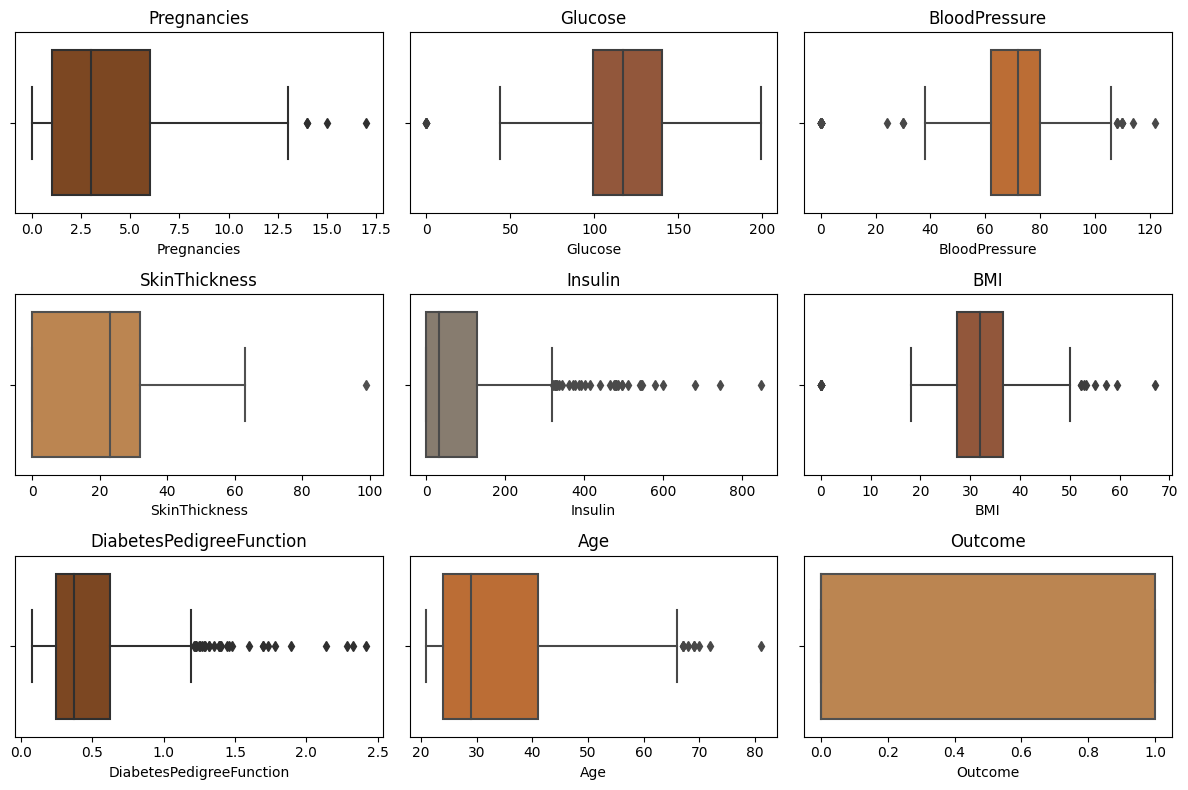

In [9]:
rows, cols = 3, 3
custom_brown_palette = ["#8B4513", "#A0522D", "#D2691E", "#CD853F", "#8B7D6B", "#A0522D", "#8B4513", "#D2691E", "#CD853F"]

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i],color=custom_brown_palette[i % len(custom_brown_palette)])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- in ( Pregnancies ) A minimum value is 0  indicates that there are individuals in the dataset who have not been pregnant.
- columns related to health measurements like 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI,' a value of 0 indicate missing or invalid data
so i will consider these as missing values and handle them.

***lets clean it***

In [11]:
columns_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_clean] = df[columns_clean].replace(0, float('nan'))


handling outliers

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df.clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR), axis=1)


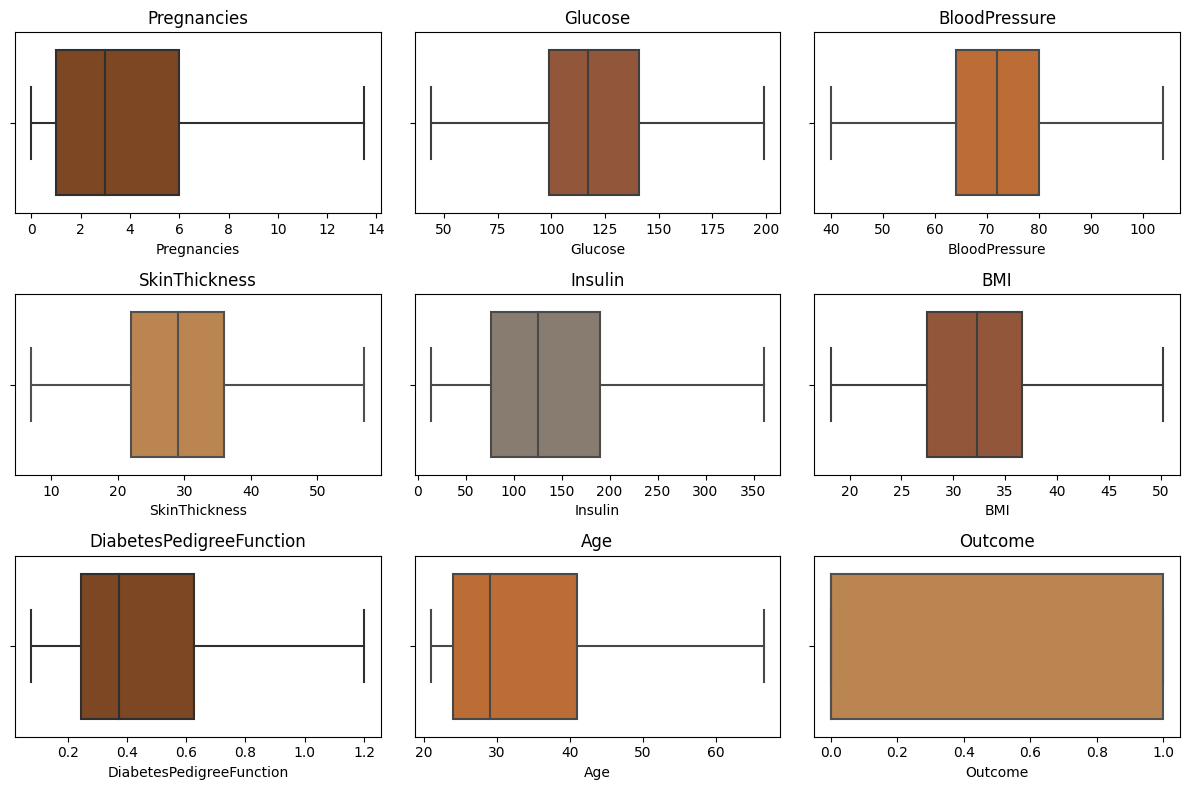

In [13]:
rows, cols = 3, 3
custom_brown_palette = ["#8B4513", "#A0522D", "#D2691E", "#CD853F", "#8B7D6B", "#A0522D", "#8B4513", "#D2691E", "#CD853F"]

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i],color=custom_brown_palette[i % len(custom_brown_palette)])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# visualization

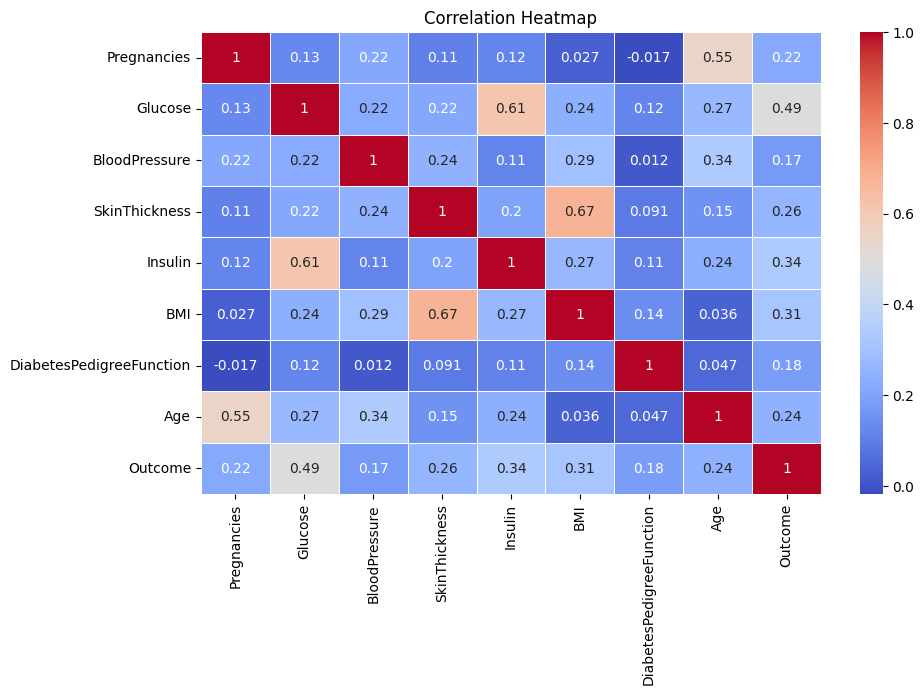

In [14]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


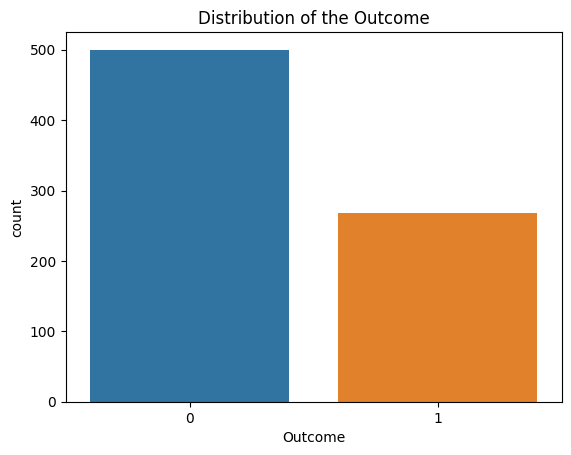

In [15]:
sns.countplot(x="Outcome", data=df)
plt.title("Distribution of the Outcome")
plt.show()


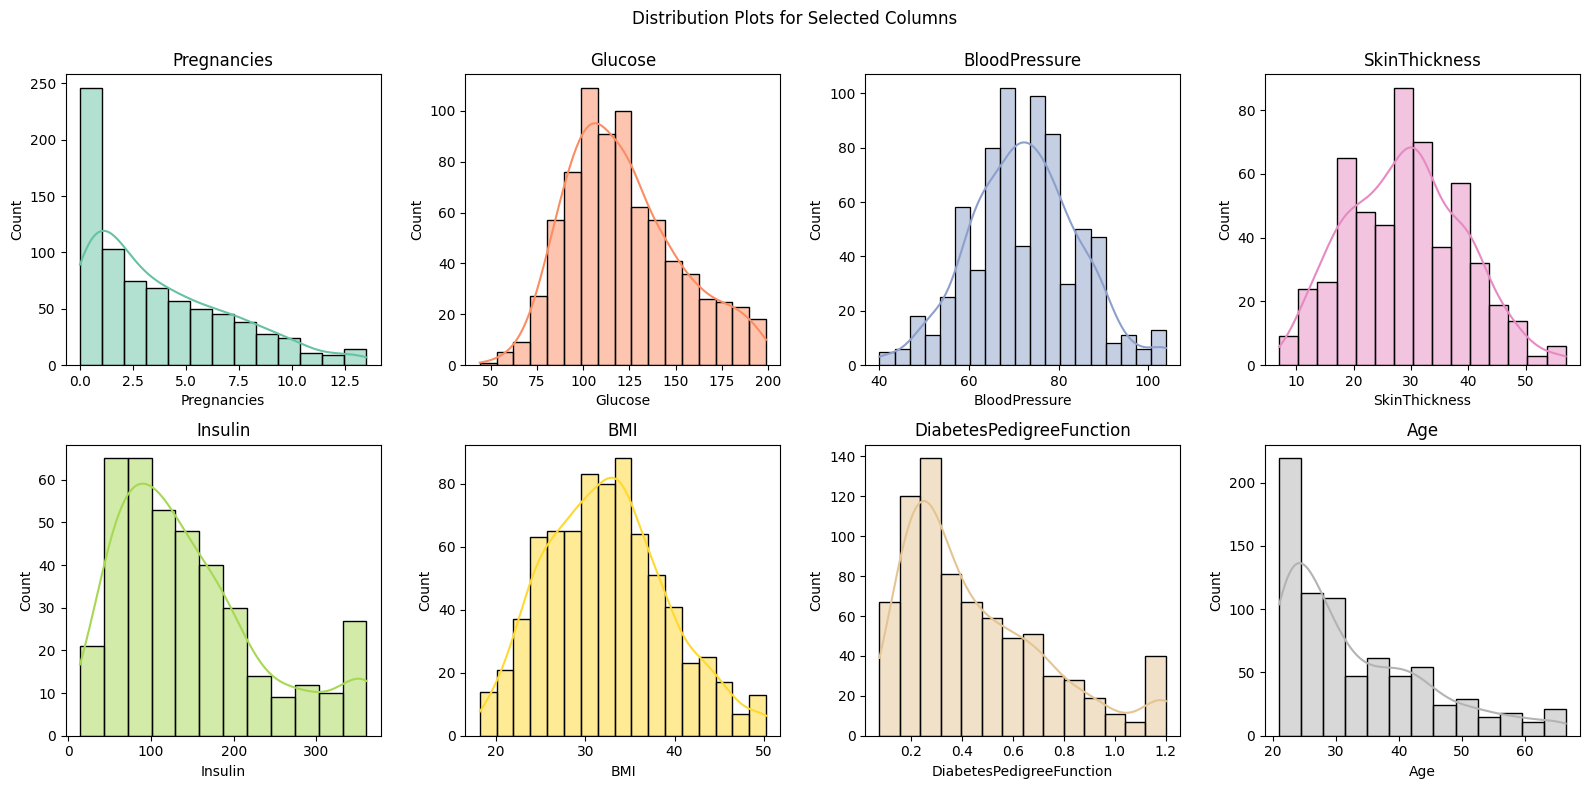

In [16]:
columns_to_plot = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("Distribution Plots for Selected Columns")
palette = sns.color_palette("Set2")
# Create distribution plots for each column
for i, (column, color) in enumerate(zip(columns_to_plot, palette)):
    row = i // 4
    col = i % 4
    sns.histplot(df[column], kde=True, color=color, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()



# conclusion

>- Most people's pregnancies between 0-2.5 months
>-Most people's glucose level ranges between 100 and 125
>-Most people's (60 < blood pressure is < 80)
>-Most people have a (25< skin thickness< 30 )
>-Most people's insulin level about 125
>-Most people's BMI level ranges between 30 and 40
>-Most people are between the ages of 20 and 30

In [17]:
def plot_box_and_hist(data, column_name, palette="Set1"):
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=data["Outcome"].map({0: "No Diabetes", 1: "Diabetes"}), y=column_name, data=data, palette=palette)
    plt.title(f"Box Plot of {column_name} by Outcome")

    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=column_name, hue=data["Outcome"].map({0: "No Diabetes", 1: "Diabetes"}), palette=palette, kde=True)
    plt.title(f"Histogram of {column_name} by Outcome")

    plt.tight_layout()
    plt.show()


***Pregnancies***

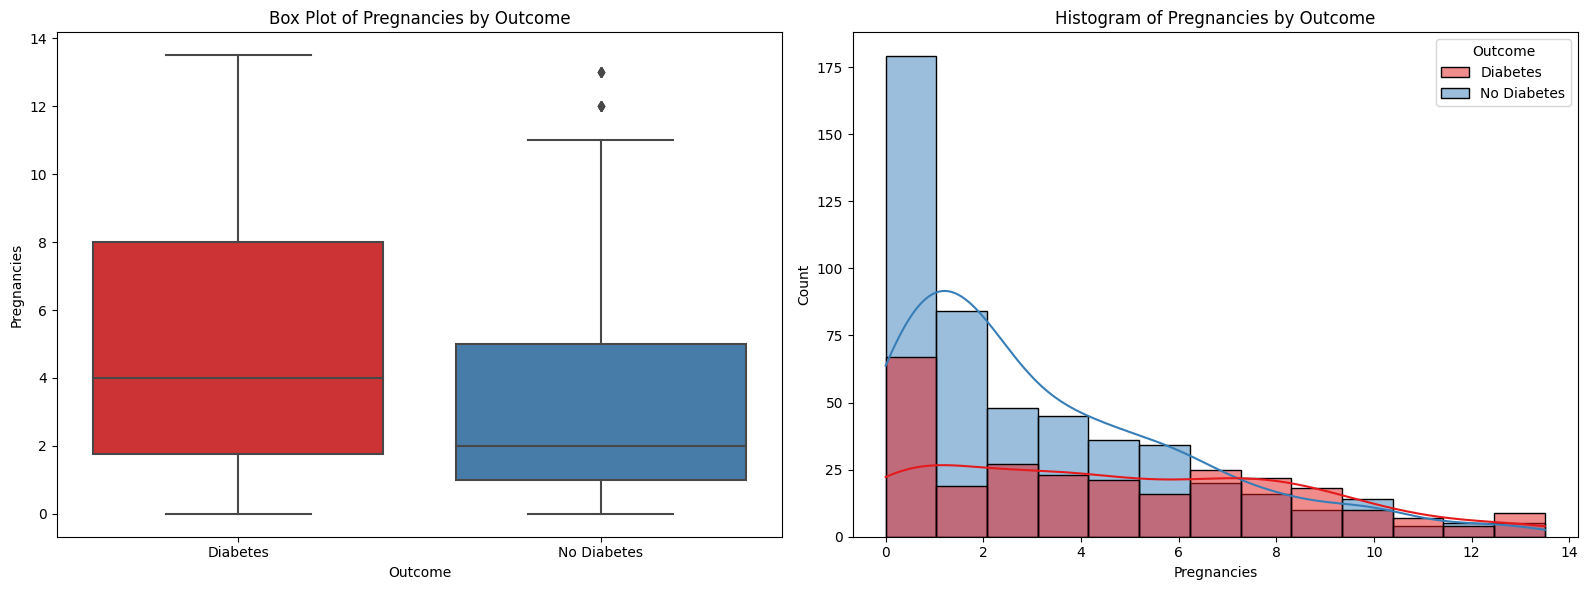

In [18]:
plot_box_and_hist(df,"Pregnancies", palette="Set1") 

Most people whose pregnancies range from 0 to 3 have a lower risk of developing diabetes

throuh increasing pregnancies, your risk of developing the disease increases

***Glucose***

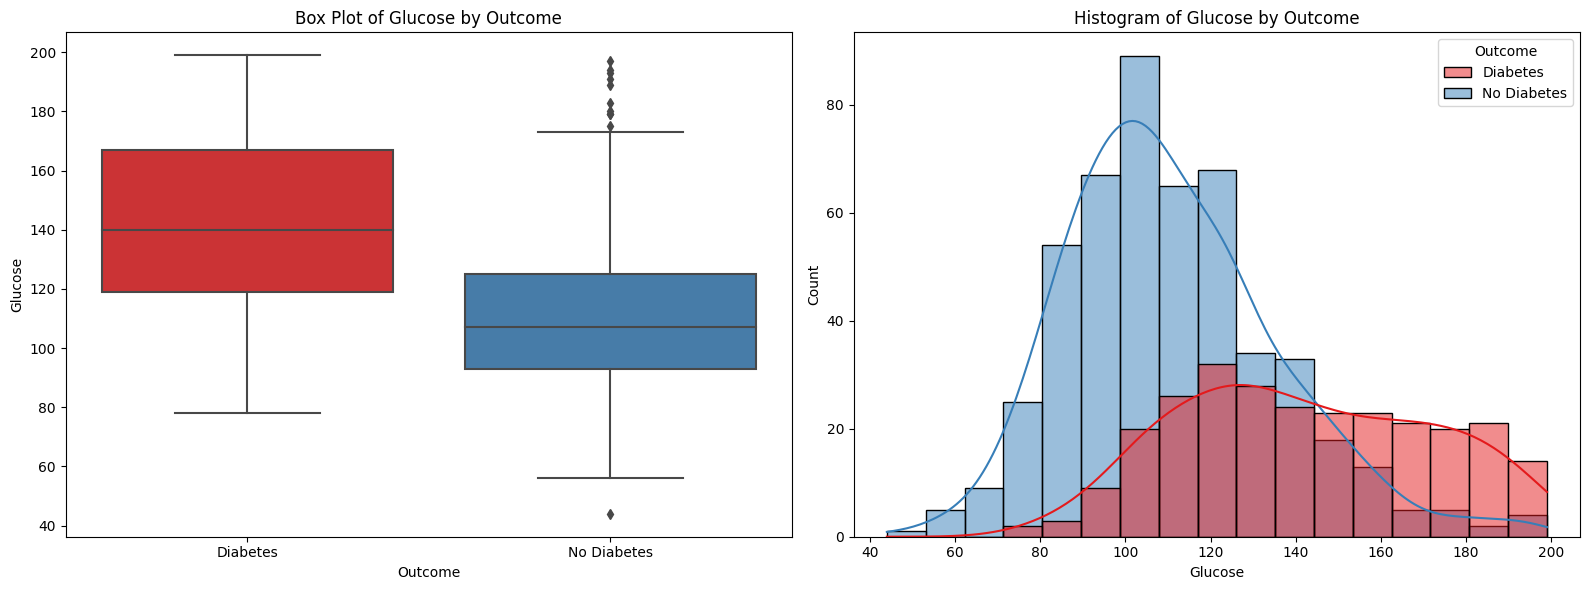

In [19]:
plot_box_and_hist(df,"Glucose", palette="Set1")

***Glucose***: High glucose levels lead to increased chances of developing diabetes

***SkinThickness***

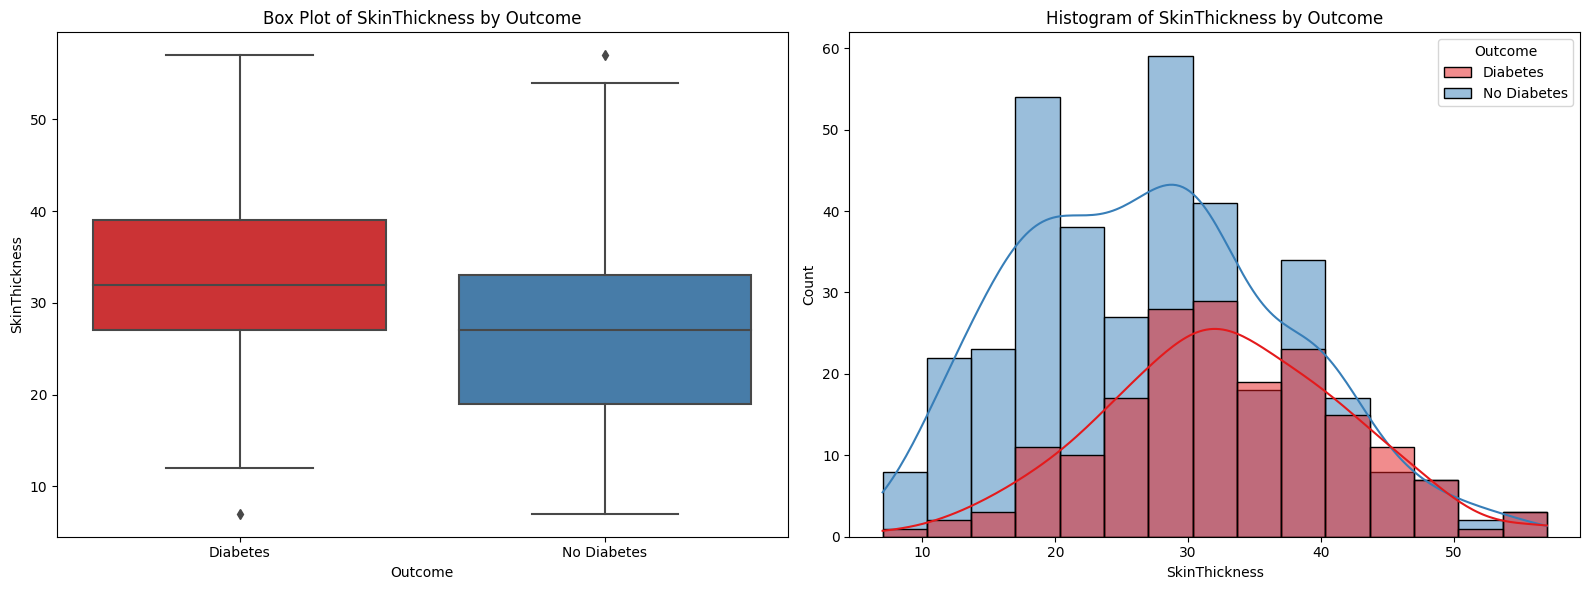

In [20]:
plot_box_and_hist(df,"SkinThickness", palette="Set1")

***blooodpressure***

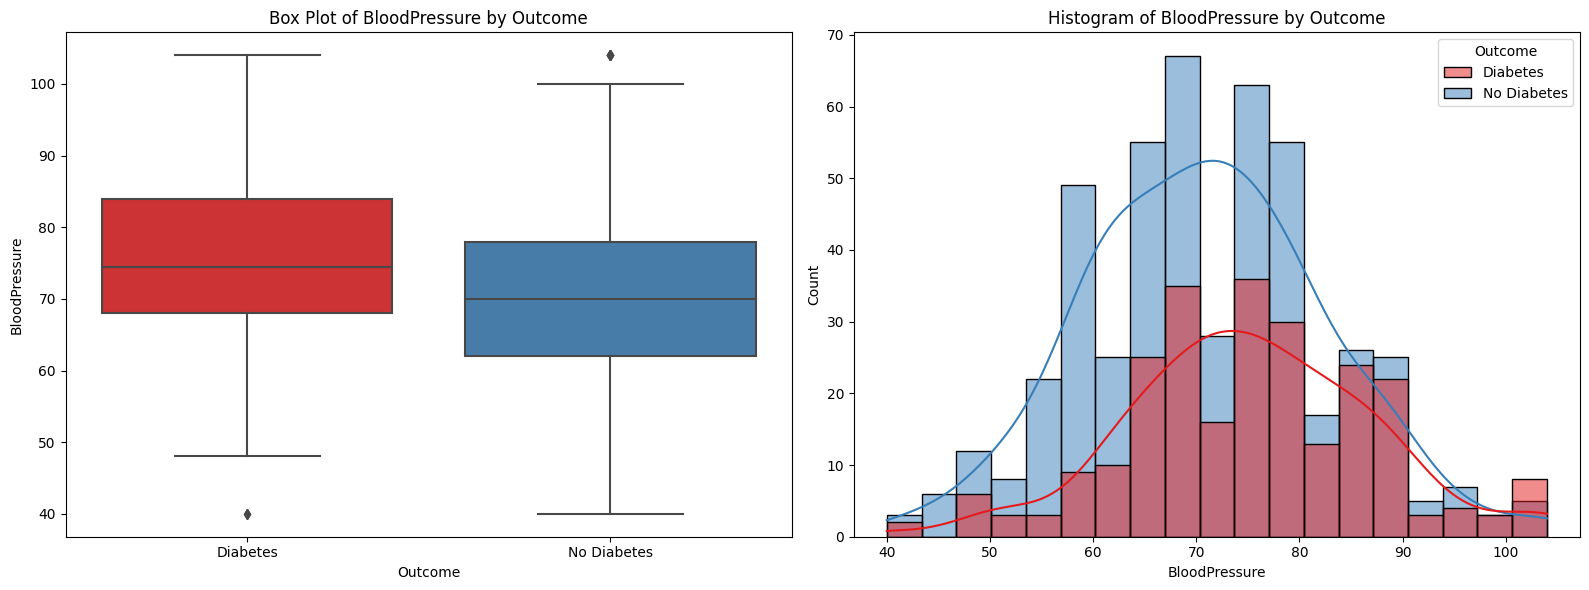

In [21]:
plot_box_and_hist(df,"BloodPressure", palette="Set1")

***Blood pressure:*** When blood pressure is high, the risk of developing diabetes is high

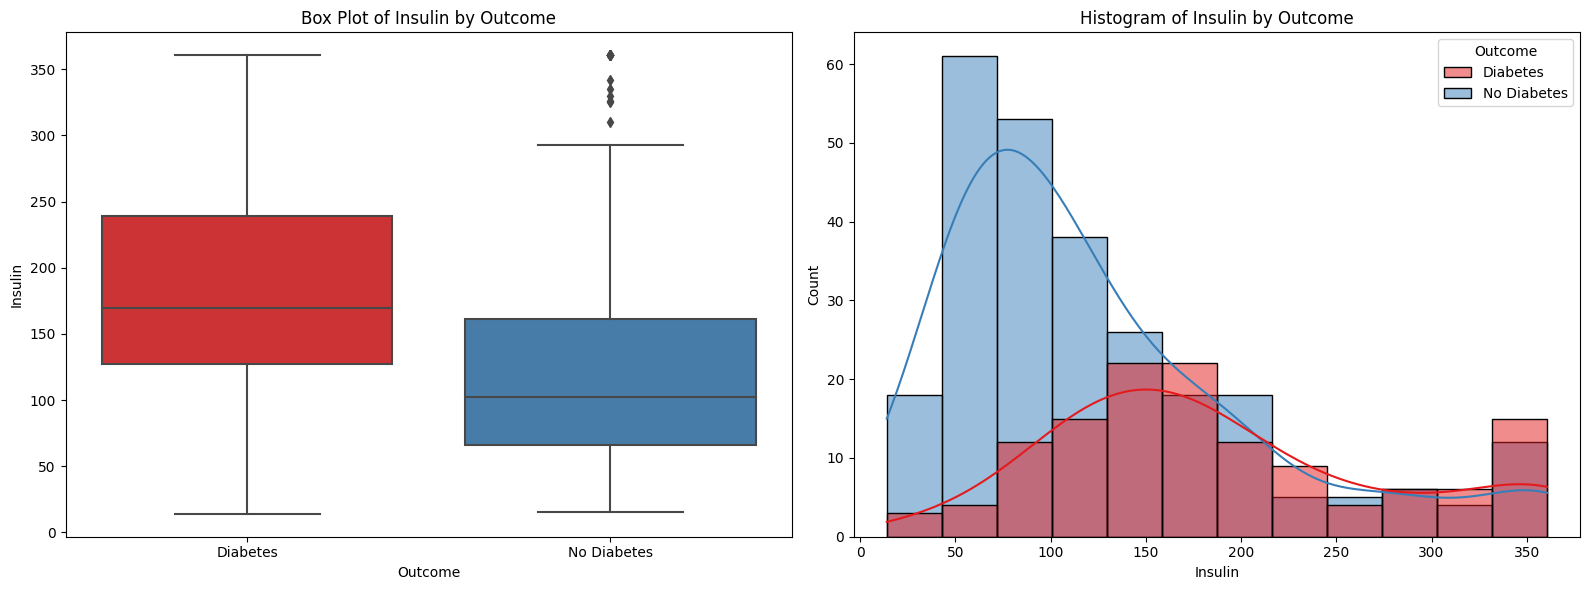

In [22]:
plot_box_and_hist(df,"Insulin", palette="Set1")

- for ***insulin*** High insulin levels increase the chances of developing diabetes

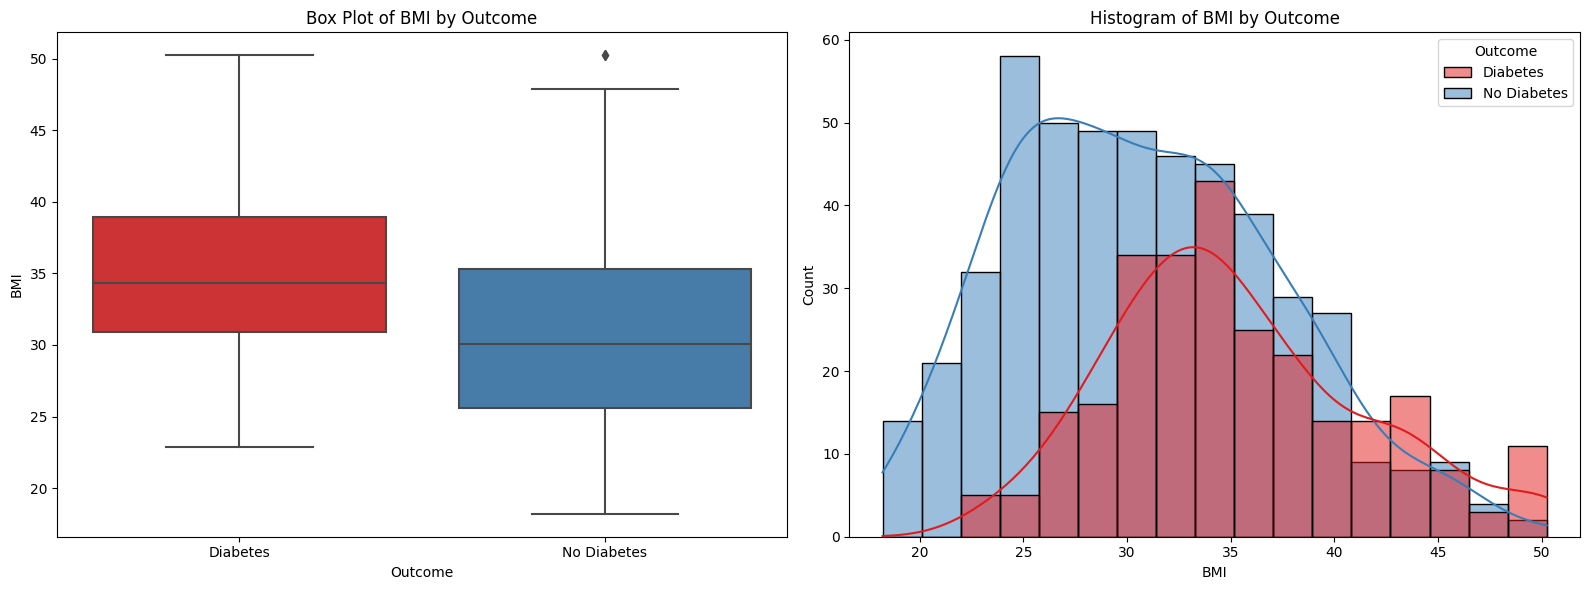

In [23]:
plot_box_and_hist(df,"BMI", palette="Set1")

***BMI*** High body mass index increases the chances of developing diabetes

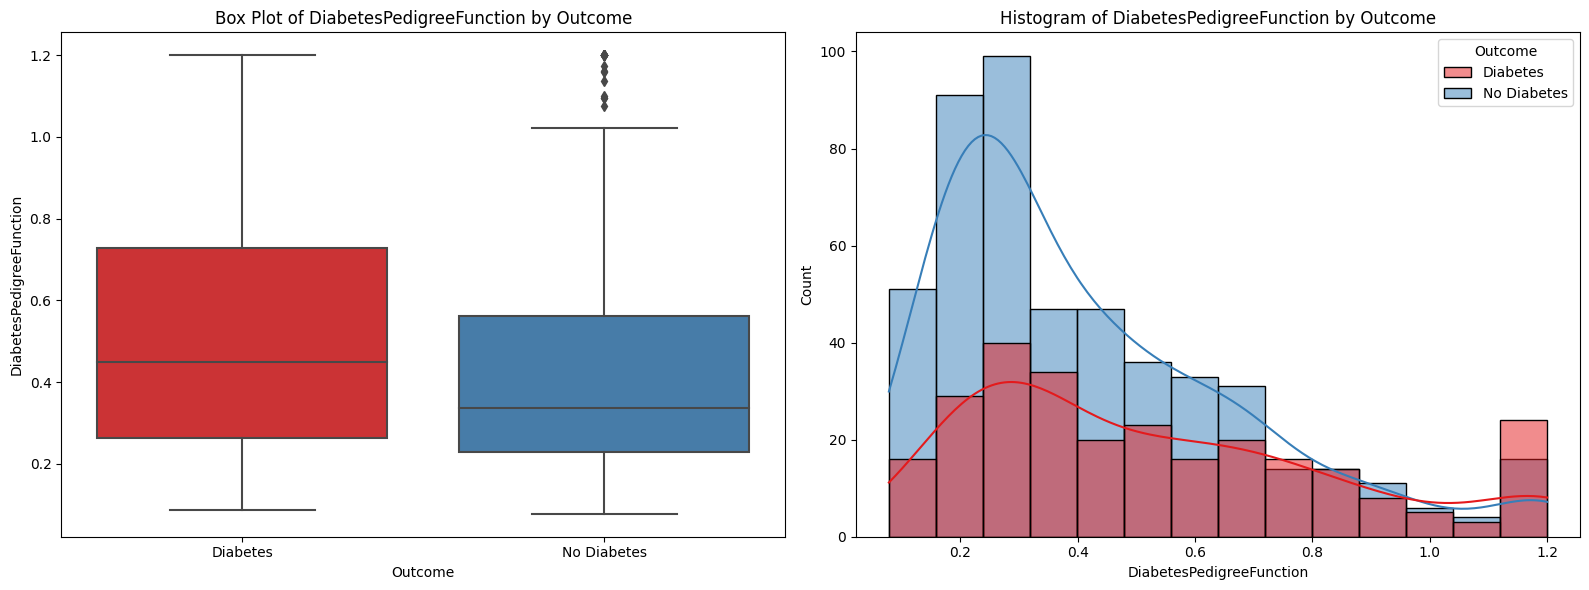

In [24]:
plot_box_and_hist(df,"DiabetesPedigreeFunction", palette="Set1") 

- for ***DiabetesPedigreeFunction*** "People suffering from diabetes exhibit elevated functional levels."

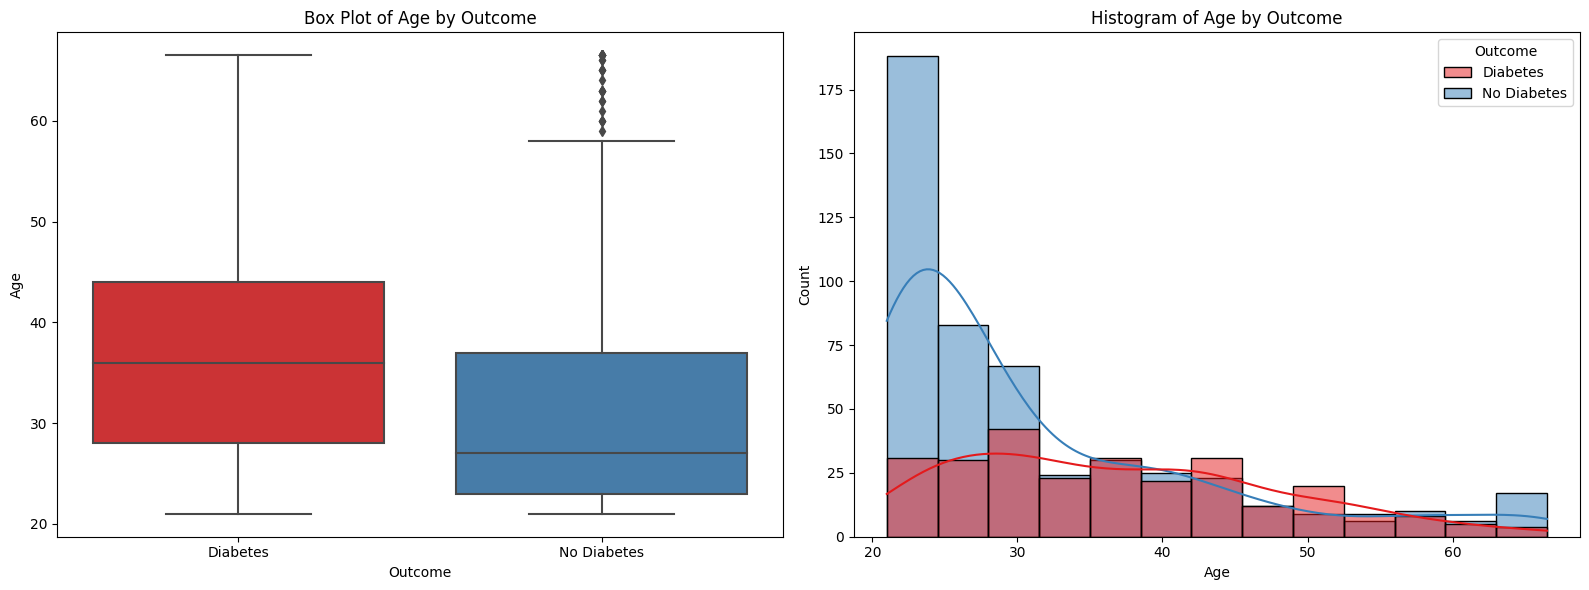

In [25]:
plot_box_and_hist(df,"Age", palette="Set1") 

***age*** Adults are at high risk of developing diabetes.

# modeling

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [27]:
X = df.drop("Outcome", axis  =1)
y = df["Outcome"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
encoder = OneHotEncoder()

In [30]:
# SimpleImputer for numerical and categorical features to fill missing values
num_imputer = SimpleImputer(strategy = "median")
cat_imputer = SimpleImputer(strategy = "most_frequent")

In [31]:
#category pipelline
cat = Pipeline([
    ("cat_imputer", cat_imputer),
    ("encoder", encoder)
])

In [32]:
#numirical pipeline
num = Pipeline([
    ("num_imputer", num_imputer),
    ("scaler", StandardScaler()),
])

In [33]:
#total pipeline
cleaning = ColumnTransformer([
    ("num", num, ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])])

In [34]:
cleaning.fit(x_train, y_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pregnancies', 'Glucose', 'BloodPressure',
                                  'SkinThickness', 'Insulin', 'BMI',
                                  'DiabetesPedigreeFunction', 'Age'])])

In [35]:
# Apply the pipeline transformations on training and testing data
X_train_transformed = cleaning.transform(x_train)
X_test_transformed = cleaning.transform(x_test)

***Tuning the hyper-parameters***

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'SGDClassifier': SGDClassifier()
}
param_grid = {
    'SVC': {'C':[0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
    'LogisticRegression': {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100]},
    'RandomForest': {'n_estimators': [10,20,50, 100, 200], 'max_depth': [None,3,2, 10, 20]},
    'DecisionTree': {'max_depth':[3, 5, 7, 9, 11, 13]},
    'KNeighbors': {'n_neighbors': [3, 20, 2]},
    'SGDClassifier': {'alpha': [0.0001, 0.001, 0.1]}
}

results_list = []

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_transformed, y_train)
    best_params = grid_search.best_params_
    accuracy = grid_search.best_score_
    results_list.append({'Model': model_name, 'Best_Params': best_params, 'Accuracy': accuracy})

results_df = pd.DataFrame(results_list)

results_df


,Model,Best_Params,Accuracy
0,SVC,"{'C': 1, 'kernel': 'rbf'}",0.768733
1,LogisticRegression,{'C': 1},0.770399
2,RandomForest,"{'max_depth': 20, 'n_estimators': 20}",0.778569
3,DecisionTree,{'max_depth': 3},0.750860
4,KNeighbors,{'n_neighbors': 20},0.768759
5,SGDClassifier,{'alpha': 0.001},0.770412


- ***the best model is random forest ***

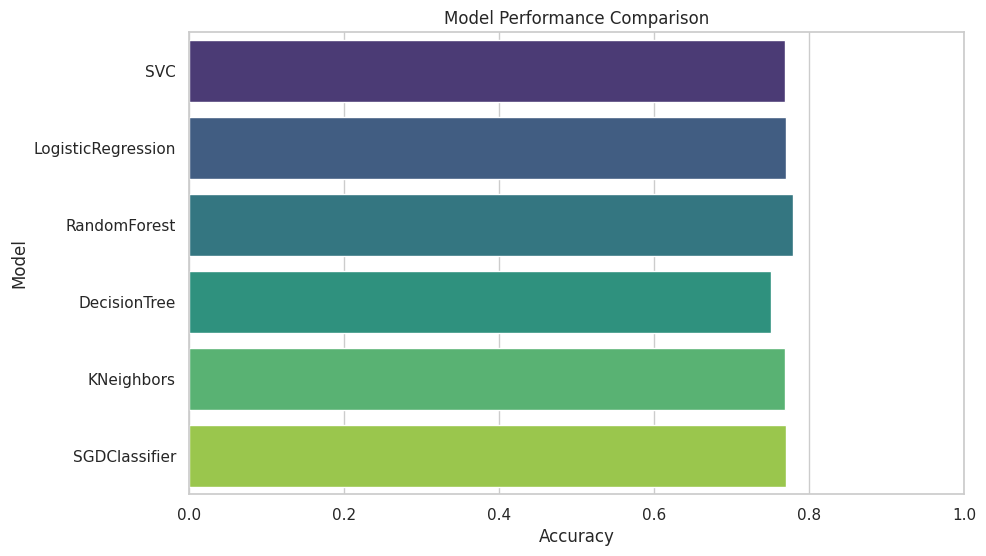

In [37]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)  # Set the x-axis range from 0 to 1 for accuracy values
plt.show()



***best model random forest***

In [38]:
best_rf_model = RandomForestClassifier()

In [39]:
best_rf_model.fit(X_train_transformed, y_train)


RandomForestClassifier()

In [40]:
y_pred = best_rf_model.predict(X_test_transformed)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.76
